# Project 3: Reinforcement Learning  
Author: Harrison Sun (sun.har@northeastern.edu)  
GitHub: https://github.com/harrisonlsun/Reinforcement-Learning-P3-Temporal-Difference-Learning-with-Mazes-and-MDM2-p53-Pathways 


## Part 1: Maze Problem

In [31]:
# import libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

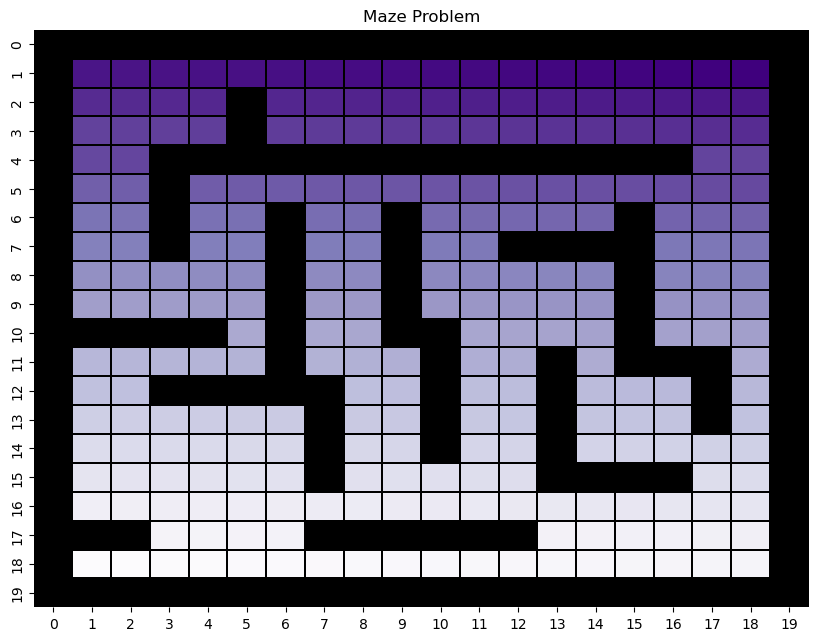

In [32]:
State_Matrix = \
    np.array([[np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN, np.NAN],
              [np.NAN, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, np.NAN],
              [np.NAN, 214, 215, 216, 217,   np.NAN, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, np.NAN],
              [np.NAN, 197, 198, 199, 200,   np.NAN, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, np.NAN],
              [np.NAN, 193, 194,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN, 195, 196, np.NAN],
              [np.NAN, 176, 177,   np.NAN, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, np.NAN],
              [np.NAN, 162, 163,   np.NAN, 164, 165,   np.NAN, 166, 167,   np.NAN, 168, 169, 170, 171, 172,   np.NAN, 173, 174, 175, np.NAN],
              [np.NAN, 151, 152,   np.NAN, 153, 154,   np.NAN, 155, 156,   np.NAN, 157, 158,   np.NAN,   np.NAN,   np.NAN,   np.NAN, 159, 160, 161, np.NAN],
              [np.NAN, 136, 137, 138, 139, 140,   np.NAN, 141, 142,   np.NAN, 143, 144, 145, 146, 147,   np.NAN, 148, 149, 150, np.NAN],
              [np.NAN, 121, 122, 123, 124, 125,   np.NAN, 126, 127,   np.NAN, 128, 129, 130, 131, 132,   np.NAN, 133, 134, 135, np.NAN],
              [np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN, 111,   np.NAN, 112, 113,   np.NAN,   np.NAN, 114, 115, 116, 117,   np.NAN, 118, 119, 120, np.NAN],
              [np.NAN,  99, 100, 101, 102, 103,   np.NAN, 104, 105, 106,   np.NAN, 107, 108,   np.NAN, 109,   np.NAN,   np.NAN,   np.NAN, 110, np.NAN],
              [np.NAN,  89,  90,   np.NAN,   np.NAN,   np.NAN,  np.NAN,   np.NAN,  91,  92,   np.NAN,  93,  94,   np.NAN,  95,  96,  97,   np.NAN,  98, np.NAN],
              [np.NAN,  75,  76,  77,  78,  79,  80,   np.NAN,  81,  82,   np.NAN,  83,  84,   np.NAN,  85,  86,  87,   np.NAN,  88, np.NAN],
              [np.NAN,  60,  61,  62,  63,  64,  65,   np.NAN,  66,  67,   np.NAN,  68,  69,   np.NAN,  70,  71,  72,  73,  74, np.NAN],
              [np.NAN,  47,  48,  49,  50,  51,  52,   np.NAN,  53,  54,  55,  56,  57,   np.NAN,   np.NAN,   np.NAN,   np.NAN,  58,  59, np.NAN],
              [np.NAN,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46, np.NAN],
              [np.NAN,   np.NAN,   np.NAN,  19,  20,  21,  22,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,  23,  24,  25,  26,  27,  28, np.NAN],
              [np.NAN,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18, np.NAN],
              [np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN, np.NAN]])
        

plt.subplots(figsize=(10,7.5))
heatmap = sns.heatmap(State_Matrix, fmt=".2f", linewidths=0.25, linecolor='black',
                      cbar= False, cmap= 'Purples')
heatmap.set_facecolor('black') # Color for the NaN cells in the state matrix
plt.title('Maze Problem')
plt.show()

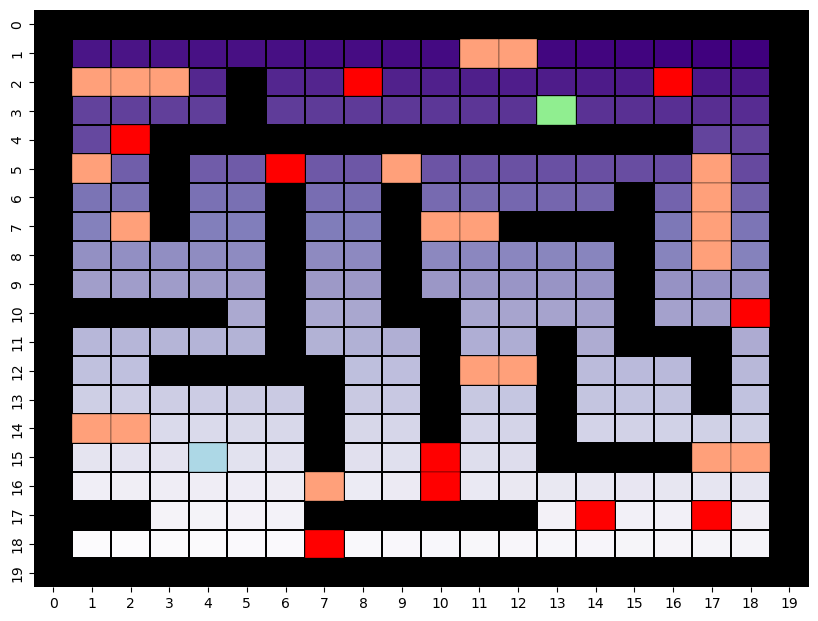

In [33]:
def coloring_blocks(heatmap, oil_states, bump_states, start_state, end_state):
    # Adding red oil blocks
    for i in range(len(oil_states)):
        heatmap.add_patch(Rectangle((oil_states[i][1], oil_states[i][0]), 1, 1,
                                    fill=True, facecolor='red', edgecolor='black', lw=0.25))
    # Adding salmon bump blocks
    for i in range(len(bump_states)):
        heatmap.add_patch(Rectangle((bump_states[i][1], bump_states[i][0]), 1, 1,
                                    fill=True, facecolor='lightsalmon', edgecolor='black', lw=0.25))
    # Adding start block (Blue)
    heatmap.add_patch(Rectangle((start_state[1], start_state[0]), 1, 1,
                                fill=True, facecolor='lightblue', edgecolor='black', lw=0.25))

    # Adding end block (Green)
    heatmap.add_patch(Rectangle((end_state[1], end_state[0]), 1, 1,
                                fill=True, facecolor='lightgreen', edgecolor='black', lw=0.25))

plt.subplots(figsize=(10,7.5))    
heatmap = sns.heatmap(State_Matrix, fmt=".2f", linewidths=0.25, linecolor='black',
                      cbar= False, cmap= 'Purples')
heatmap.set_facecolor('black') # Color for the NaN cells in the state matrix
coloring_blocks(heatmap, oil_states=[(4,2),(5,6), (2,8), (2,16), (10,18), (15,10), (16,10), (18,7), (17,14), (17,17)], bump_states=[(5,1), (7,2), (1,11), (1,12), (2,1), (2,2), (2,3), (5,17), (6,17), (7,17), (8,17), (7,10), (7,11), (5,9), (12,11), (12,12), (15,17), (15,18), (16,7), (14,1), (14,2)], \
                start_state=(15,4),end_state=(3,13))
plt.show()

In [34]:
# Global Variable Definitions
end = +200      # Reward for reaching the end state
oil = -5        # Reward for stepping on an oil block
bump = -10      # Reward for stepping on a bump block
action = -1     # Reward for taking an action (every move)
goal_state = (3,13)

In [35]:
def reward(s):
    if s == (3, 13): # End state
        return action + end
    elif s in [(4,2),(5,6), (2,8), (2,16), (10,18), (15,10), (16,10), (18,7), (17,14), (17,17)]:
        return action + oil
    elif s in [(5,1), (7,2), (1,11), (1,12), (2,1), (2,2), (2,3), (5,17), (6,17), (7,17), (8,17), (7,10), (7,11), (5,9), (12,11), (12,12), (15,17), (15,18), (16,7), (14,1), (14,2)]:
        return action + bump
    else:
        return action

In [36]:
def plot_policy_path(policy, start_state, grid_shape, State_Matrix):
    direction_mapping = {0: 'up', 1: 'down', 2: 'left', 3: 'right'}
    current_state = start_state
    path = []
    
    for _ in range(np.prod(grid_shape)):  # Limit the path length to avoid infinite loops
        action = policy[current_state]
        direction = direction_mapping[action]
        path.append((current_state, direction))
        
        # Determine next state based on the action
        if direction == 'right':
            next_state = (current_state[0], current_state[1] + 1)
        elif direction == 'left':
            next_state = (current_state[0], current_state[1] - 1)
        elif direction == 'up':
            next_state = (current_state[0] - 1, current_state[1])
        elif direction == 'down':
            next_state = (current_state[0] + 1, current_state[1])
        
        # Check if next state is within grid bounds and not a wall
        if 0 <= next_state[0] < grid_shape[0] and 0 <= next_state[1] < grid_shape[1] and not np.isnan(State_Matrix[next_state[0], next_state[1]]):
            current_state = next_state
        else:
            # If next state is a wall or out of bounds, stop moving in that direction
            path.append((current_state, 'stop'))
            break
    
    # Heatmap generation
    plt.subplots(figsize=(10,7.5))    
    heatmap = sns.heatmap(State_Matrix, fmt=".2f", linewidths=0.25, linecolor='black',
                        cbar= False, cmap= 'Purples')
    heatmap.set_facecolor('black')  # Color for the NaN cells in the state matrix

    # coloring_blocks function
    coloring_blocks(heatmap, oil_states=[(4,2),(5,6), (2,8), (2,16), (10,18), (15,10), (16,10), (18,7), (17,14), (17,17)], 
                    bump_states=[(5,1), (7,2), (1,11), (1,12), (2,1), (2,2), (2,3), (5,17), (6,17), (7,17), (8,17), (7,10), (7,11), (5,9), (12,11), (12,12), (15,17), (15,18), (16,7), (14,1), (14,2)], 
                    start_state=(15,4), end_state=(3,13))

    # Plotting the path with arrows
    for state_cr, direction in path:
        r, c = state_cr
        if state_cr == goal_state:
            break
        if direction == 'right':
            plt.arrow(c + 0.5, r + 0.5, 0.8, 0, width=0.04, color='black')
        elif direction == 'left':
            plt.arrow(c + 0.5, r + 0.5, -0.8, 0, width=0.04, color='black')
        elif direction == 'up':
            plt.arrow(c + 0.5, r + 0.5, 0, -0.8, width=0.04, color='black')
        elif direction == 'down':
            plt.arrow(c + 0.5, r + 0.5, 0, 0.8, width=0.04, color='black')

    plt.title('Optimal Path')
    plt.show()


In [37]:
def draw_policy(State_Matrix, policy):
    direction_mapping = {0: 'up', 1: 'down', 2: 'left', 3: 'right'}
    grid_shape = State_Matrix.shape
    
    # Heatmap generation
    plt.subplots(figsize=(10, 7.5))    
    heatmap = sns.heatmap(State_Matrix, annot=False, fmt=".2f", linewidths=0.25, linecolor='black',
                        cbar=False, cmap='Purples')
    heatmap.set_facecolor('black')  # Color for the NaN cells in the state matrix

    # Annotate arrows for policy
    for i in range(grid_shape[0]):
        for j in range(grid_shape[1]):
            if not np.isnan(State_Matrix[i, j]):
                action = policy[i, j]
                direction = direction_mapping[action]

                # Draw the arrows based on the direction
                if direction == 'right':
                    plt.arrow(j + 0.5, i + 0.5, 0.3, 0, width=0.04, color='black')
                elif direction == 'left':
                    plt.arrow(j + 0.5, i + 0.5, -0.3, 0, width=0.04, color='black')
                elif direction == 'up':
                    plt.arrow(j + 0.5, i + 0.5, 0, -0.3, width=0.04, color='black')
                elif direction == 'down':
                    plt.arrow(j + 0.5, i + 0.5, 0, 0.3, width=0.04, color='black')

    plt.title('Policy Visualization')
    plt.show()

### 1.1: This portion uses Q-Learning to solve the maze problem
$p = 0.02, \gamma = 0.95, \alpha = 0.3, \epsilon = 0.1 $

In [38]:
def q_learning(State_Matrix, goal_state, episodes, p, alpha, gamma, epsilon, max_steps):
    # Initialization
    Q = np.random.rand(*State_Matrix.shape, 4)  # Initialize Q(s,a) arbitrarily for all states and actions
    policy = np.zeros(State_Matrix.shape, dtype=int)
    accumulated_rewards = np.zeros(episodes)
    actions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Up, Down, Left, Right
    goal_state_reached_counter = 0

    for episode in range(episodes):
        # Initialize state randomly
        state = (np.random.choice(np.where(~np.isnan(State_Matrix))[0]), 
                 np.random.choice(np.where(~np.isnan(State_Matrix))[1]))
        total_reward = 0
        steps = 0

        while not np.array_equal(state, goal_state) and steps < max_steps:
            # Choose action from state using policy derived from Q (epsilon-greedy)
            if np.random.rand() < epsilon:
                action = np.random.choice(4)  # Explore: select a random action
            else:
                action = np.argmax(Q[state])  # Exploit: select the best action based on current Q-values
                # Add stochasticity
                if np.random.rand() < p:
                    action = np.random.choice(4)
                else:
                    action = np.argmax(Q[state])
                    

            # Take action and observe reward and new state
            next_i, next_j = state[0] + actions[action][0], state[1] + actions[action][1]
            # Ensure next state is within bounds and is not a wall (nan)
            if 0 <= next_i < State_Matrix.shape[0] and 0 <= next_j < State_Matrix.shape[1] and not np.isnan(State_Matrix[next_i, next_j]):
                next_state = (next_i, next_j)
            else:
                next_state = state  # Remain in same state if move is not valid

            # Reward function
            r = reward(next_state)
            total_reward += r

            # Update Q-Table using the Q-learning iteration
            Q[state][action] += alpha * (r + gamma * np.max(Q[next_state]) - Q[state][action])

            # Move to the next state
            state = next_state

            # Increment step count
            steps += 1

            # If goal state is reached, increment counter
            if np.array_equal(state, goal_state):
                goal_state_reached_counter += 1

        # Update the accumulated rewards
        accumulated_rewards[episode] = total_reward

        # Derive policy from Q
        for i in range(State_Matrix.shape[0]):
            for j in range(State_Matrix.shape[1]):
                if not np.isnan(State_Matrix[i, j]):
                    policy[i, j] = np.argmax(Q[i, j])
    
    return policy, accumulated_rewards, goal_state_reached_counter

Q-Learning Outputs

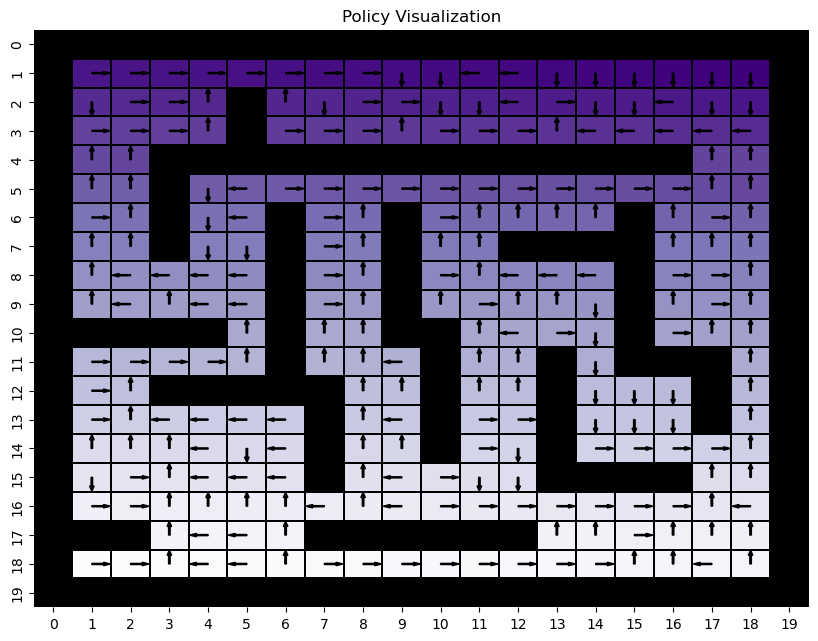

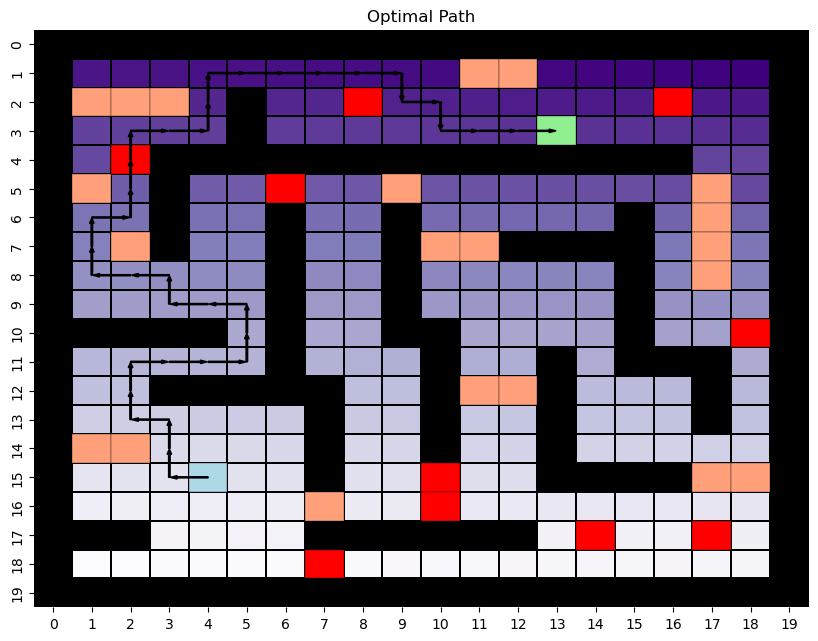

Goal State Reached Counter: [981. 981. 976. 978. 978. 974. 980. 975. 973. 973.]
Number of Iterations where Goal State was Reached at least once: 10
Total Number of Times Goal was Reached: 9769.0


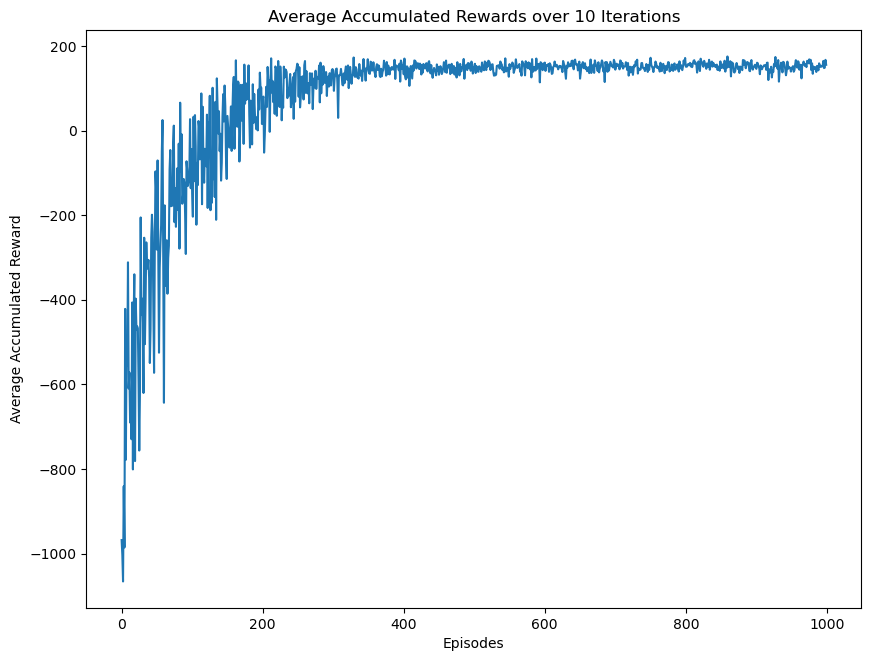

In [39]:
# Run 10 iterations of the Q-Learning Algorithm and plot the average accumulated reward over the episodes
episodes = 1000
p = 0.2
gamma = 0.95
alpha = 0.3
epsilon = 0.1

average_accumulated_rewards_q = np.zeros(episodes)
goal_state_reached_counter = np.zeros(10)

# Choose random number between 0 and 9
random_number = np.random.randint(0, 10)

for iteration in range(10):
    policy, accumulated_rewards, goal_counter = q_learning(State_Matrix, goal_state, episodes, p, alpha, gamma, epsilon, max_steps=1000)
    average_accumulated_rewards_q += accumulated_rewards/10
    goal_state_reached_counter[iteration] = goal_counter
    # If the random number matches the iteration number, draw the policy and plot the policy path
    if iteration == random_number:
        draw_policy(State_Matrix, policy)
        plot_policy_path(policy, start_state=(15,4), grid_shape=(20,20), State_Matrix=State_Matrix)
# print('Average Accumulated Rewards:', average_accumulated_rewards)
plt.figure(figsize=(10, 7.5))
plt.title('Average Accumulated Rewards over 10 Iterations')
plt.xlabel('Episodes')
plt.ylabel('Average Accumulated Reward')
plt.plot(average_accumulated_rewards_q)
# Print the number of times the goal state was reached in each iteration as well as the number of iterations where the goal was reached at least once
print('Goal State Reached Counter:', goal_state_reached_counter)
print('Number of Iterations where Goal State was Reached at least once:', np.sum(goal_state_reached_counter > 0))
print('Total Number of Times Goal was Reached:', np.sum(goal_state_reached_counter))

### 1.2: This portion uses SARSA to solve the maze problem
$p = 0.02, \gamma = 0.95, \alpha = 0.3, \epsilon = 0.1 $

In [40]:
def sarsa(State_Matrix, goal_state, episodes, p, alpha, gamma, epsilon, max_steps):
    # Initialization
    Q = np.random.rand(*State_Matrix.shape, 4)  # Initialize Q-values
    policy = np.zeros(State_Matrix.shape, dtype=int)
    accumulated_rewards = np.zeros(episodes)
    actions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Directions: Up, Down, Left, Right
    goal_state_reached_counter = 0

    for episode in range(episodes):
        # Initialize state randomly
        state = (np.random.choice(np.where(~np.isnan(State_Matrix))[0]), 
                 np.random.choice(np.where(~np.isnan(State_Matrix))[1]))
        total_reward = 0
        steps = 0
        
        # Initial action selection using epsilon-greedy policy
        if np.random.rand() < epsilon:
            action = np.random.choice(4)  # Explore: random action
        else:
            action = np.argmax(Q[state])  # Exploit: select the best action based on current Q-values
            # Add stochasticity
            if np.random.rand() < p:
                action = np.random.choice(4)
            else:
                action = np.argmax(Q[state])

        while not np.array_equal(state, goal_state) and steps < max_steps:
            # Calculate next state based on current action
            next_i, next_j = state[0] + actions[action][0], state[1] + actions[action][1]

            # Check if next state is valid
            if 0 <= next_i < State_Matrix.shape[0] and 0 <= next_j < State_Matrix.shape[1] and not np.isnan(State_Matrix[next_i, next_j]):
                next_state = (next_i, next_j)
            else:
                next_state = state  # Stay in current state if move is invalid

            # Reward function assumed to be defined elsewhere
            r = reward(next_state)
            total_reward += r

            # Select next action from next state using epsilon-greedy policy
            if np.random.rand() < epsilon:
                next_action = np.random.choice(4)
            else:
                next_action = np.argmax(Q[next_state])

            # Update Q-Table using the SARSA update rule - next_action is used here without stochasticity of p
            Q[state][action] += alpha * (r + gamma * Q[next_state][next_action] - Q[state][action])

            # Stochastic next action
            if np.random.rand() < p:
                next_action = np.random.choice(4)
            else:
                next_action = np.argmax(Q[next_state])

            # Transition to next state and action
            state, action = next_state, next_action

            # Increment step count
            steps += 1

            # Increment counter if goal state reached
            if np.array_equal(state, goal_state):
                goal_state_reached_counter += 1

        # Store total reward for this episode
        accumulated_rewards[episode] = total_reward

    # Derive final policy from Q-values
    for i in range(State_Matrix.shape[0]):
        for j in range(State_Matrix.shape[1]):
            if not np.isnan(State_Matrix[i, j]):
                policy[i, j] = np.argmax(Q[i, j])

    return policy, accumulated_rewards, goal_state_reached_counter

SARSA Outputs

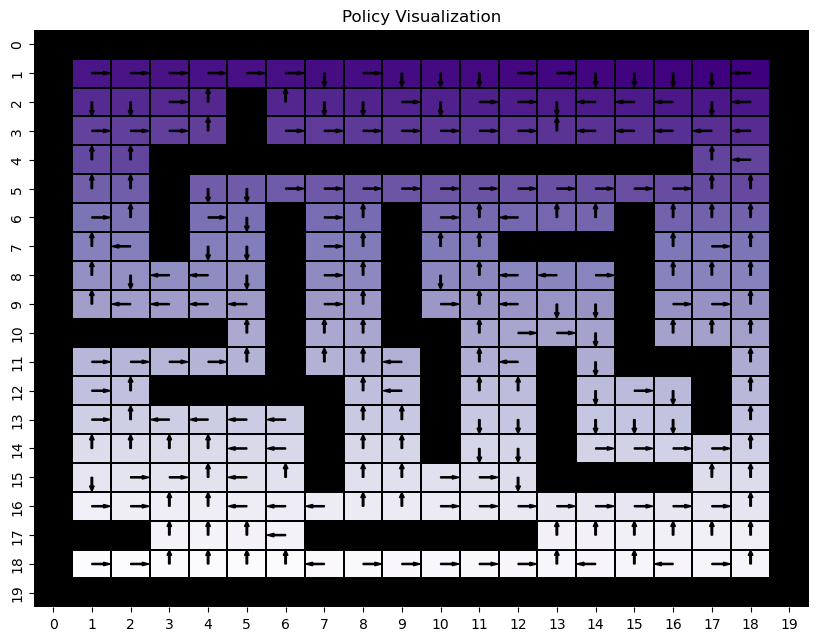

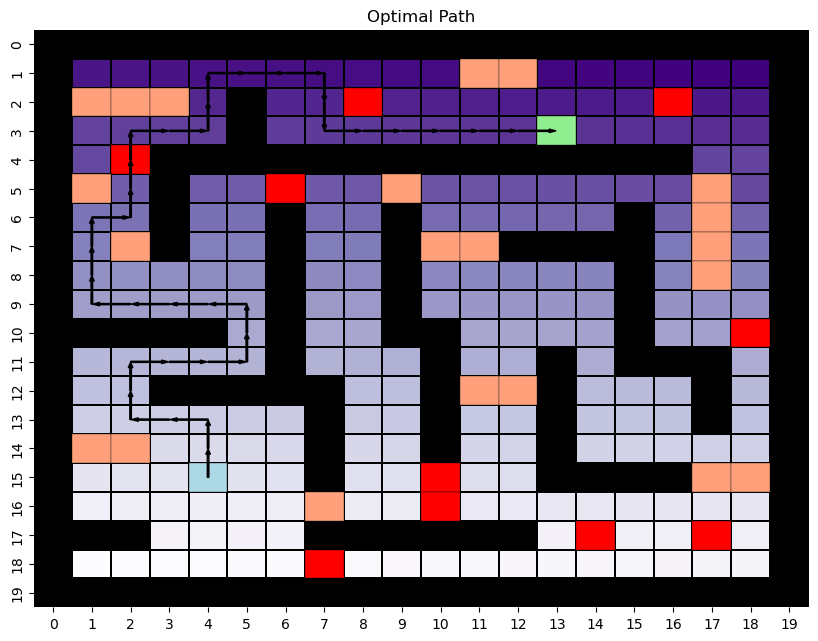

Goal State Reached Counter: [961. 971. 971. 962. 962. 962. 972. 968. 968. 961.]
Number of Iterations where Goal State was Reached at least once: 10
Total Number of Times Goal was Reached: 9658.0


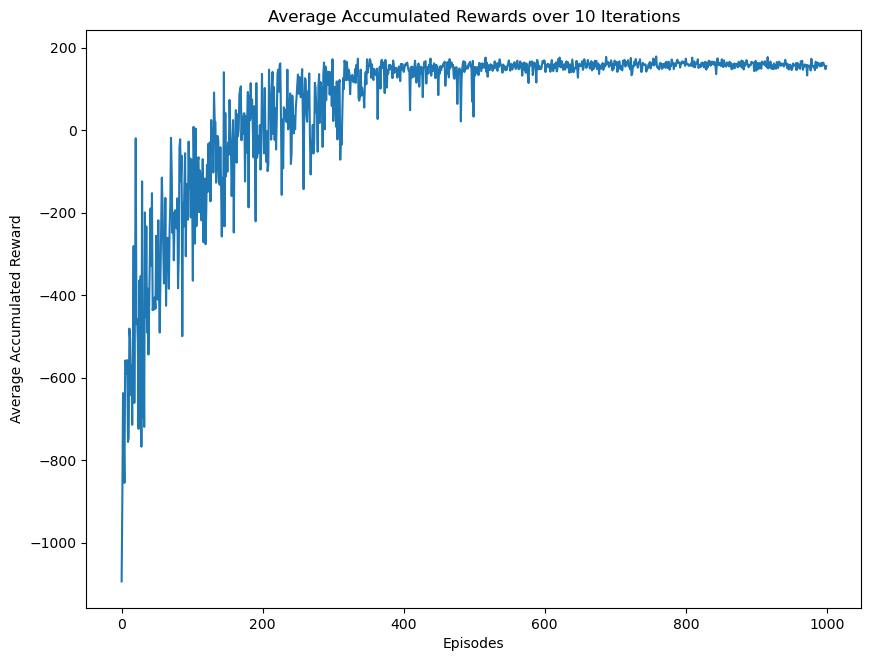

In [43]:
# Run 10 iterations of the SARSA Algorithm and plot the average accumulated reward over the episodes
episodes = 1000
p = 0.2
gamma = 0.95
alpha = 0.3
epsilon = 0.1

average_accumulated_rewards_sarsa = np.zeros(episodes)
goal_state_reached_counter = np.zeros(10)

# Choose random number between 0 and 9
random_number = np.random.randint(0, 10)

for iteration in range(10):
    policy, accumulated_rewards, goal_counter = sarsa(State_Matrix, goal_state, episodes, p, alpha, gamma, epsilon, max_steps=1000)
    average_accumulated_rewards_sarsa += accumulated_rewards/10
    goal_state_reached_counter[iteration] = goal_counter
    # If the random number matches the iteration number, draw the policy and plot the policy path
    if iteration == random_number:
        draw_policy(State_Matrix, policy)
        plot_policy_path(policy, start_state=(15,4), grid_shape=(20,20), State_Matrix=State_Matrix)
# print('Average Accumulated Rewards:', average_accumulated_rewards)
plt.figure(figsize=(10, 7.5))
plt.title('Average Accumulated Rewards over 10 Iterations')
plt.xlabel('Episodes')
plt.ylabel('Average Accumulated Reward')
plt.plot(average_accumulated_rewards_sarsa)
# Print the number of times the goal state was reached in each iteration as well as the number of iterations where the goal was reached at least once
print('Goal State Reached Counter:', goal_state_reached_counter)
print('Number of Iterations where Goal State was Reached at least once:', np.sum(goal_state_reached_counter > 0))
print('Total Number of Times Goal was Reached:', np.sum(goal_state_reached_counter))

### 1.3: This portion uses Actor-Critic to solve the maze problem
$\gamma = 0.95, \alpha = 0.3, \beta = 0.05 $

In [44]:
def actor_critic(State_Matrix, goal_state, episodes, gamma, alpha, beta, max_steps):
    actions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Up, Down, Left, Right

    def softmax(x):
        e_x = np.exp(x - np.max(x))
        return e_x / e_x.sum(axis=0)

    V = np.zeros_like(State_Matrix)  # State value function
    H = np.zeros((State_Matrix.shape[0], State_Matrix.shape[1], 4))  # Policy parameters (H)
    numerical_policy = np.zeros((State_Matrix.shape[0], State_Matrix.shape[1], 4))  # Numerical policy probabilities
    greedy_policy = np.zeros_like(State_Matrix, dtype=int)  # Greedy policy
    accumulated_rewards = np.zeros(episodes)
    goal_state_reached_counter = 0

    for episode in range(episodes):
        # Find valid starting positions
        valid_positions = np.argwhere(~np.isnan(State_Matrix))
        start_pos_index = np.random.choice(len(valid_positions))
        state = tuple(valid_positions[start_pos_index])

        steps = 0
        total_reward = 0

        while not np.array_equal(state, goal_state) and steps < max_steps:
            numerical_policy[state] = softmax(H[state])

            action = np.random.choice(len(actions), p=numerical_policy[state])
            next_i, next_j = state[0] + actions[action][0], state[1] + actions[action][1]

            if 0 <= next_i < State_Matrix.shape[0] and 0 <= next_j < State_Matrix.shape[1] and not np.isnan(State_Matrix[next_i, next_j]):
                next_state = (next_i, next_j)
                r = reward(next_state)
            else:
                next_state = state  # Stay in current state if move is invalid
                r = reward(state)

            # Calculate TD error (critic)
            td_error = r + gamma * V[next_state] - V[state]
            
            # Update state value function and policy parameters
            V[state] += alpha * td_error
            H[state][action] += beta * td_error * (1 - numerical_policy[state][action])

            if next_state == goal_state:
                goal_state_reached_counter += 1

            state = next_state
            total_reward += r
            steps += 1

        accumulated_rewards[episode] = total_reward

    # Update the greedy policy for each state
    for i in range(State_Matrix.shape[0]):
        for j in range(State_Matrix.shape[1]):
            if not np.isnan(State_Matrix[i, j]):
                greedy_policy[i, j] = np.argmax(numerical_policy[i, j])

    return greedy_policy, numerical_policy, accumulated_rewards, goal_state_reached_counter



Actor-Critic Outputs

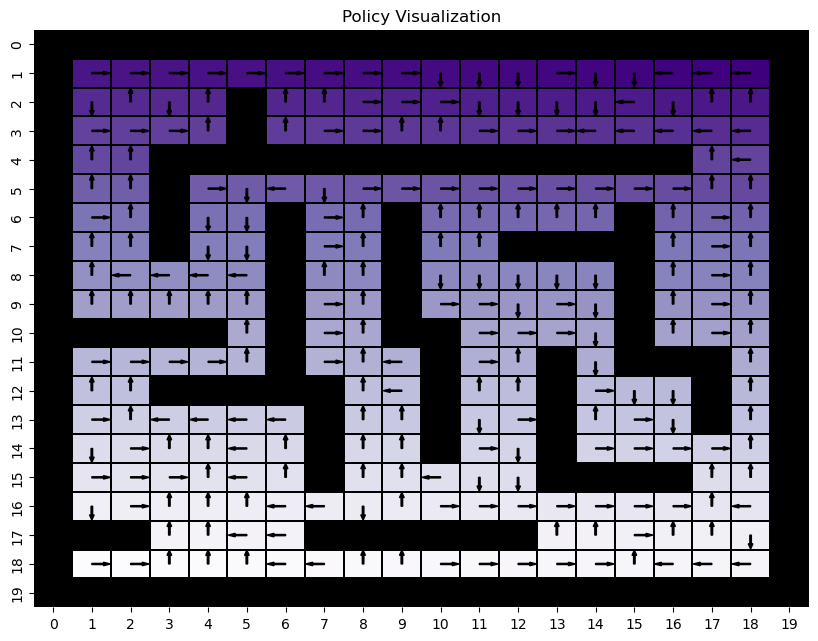

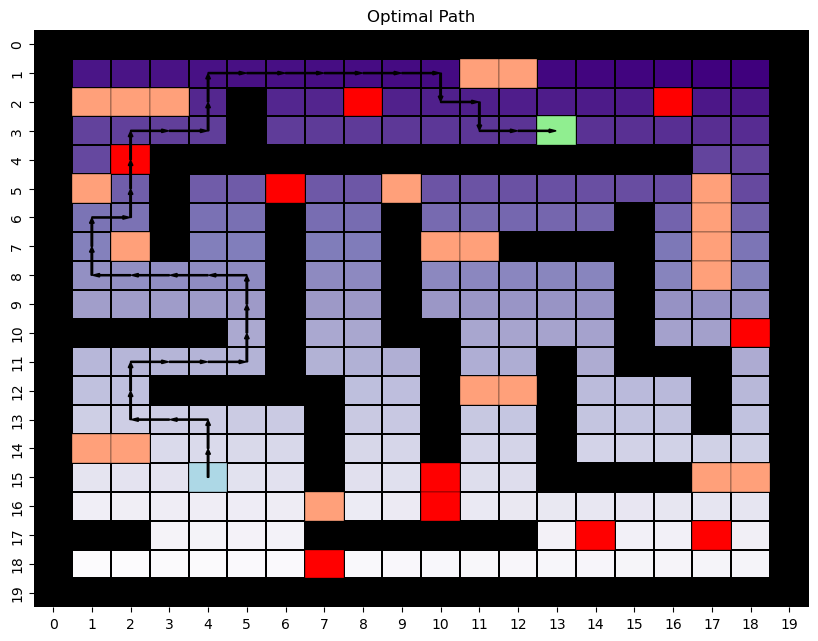

Goal State Reached Counter: [355. 393. 302. 334. 330. 401. 335. 345. 424. 330.]
Number of Iterations where Goal State was Reached at least once: 10
Total Number of Times Goal was Reached: 3549.0


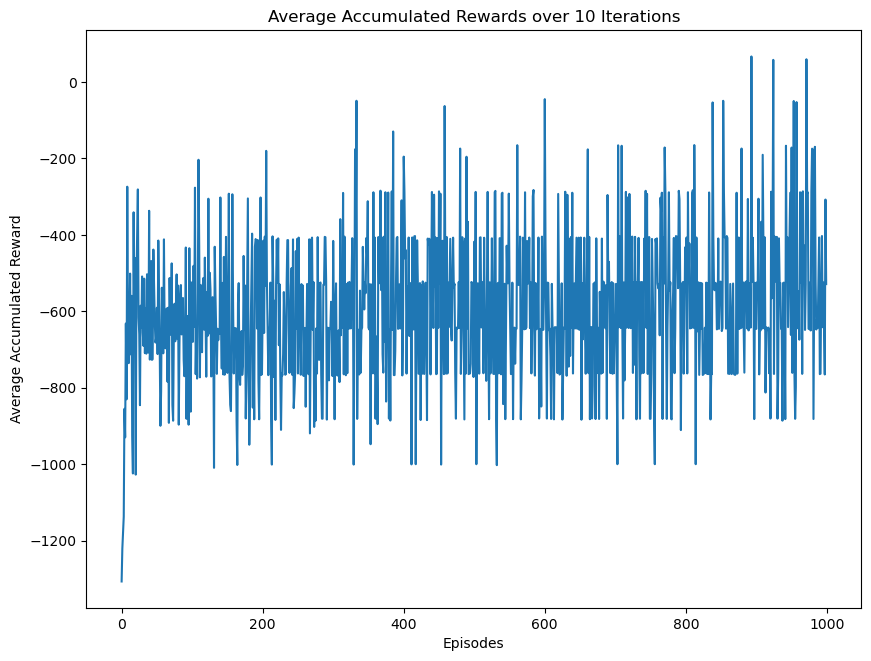

In [45]:
# Run 10 iterations of the Actor-Critic Algorithm
episodes = 1000
gamma = 0.95
alpha = 0.3
beta = 0.05

average_accumulated_rewards_ac = np.zeros(episodes)
goal_state_reached_counter = np.zeros(10)

# Choose random number between 0 and 9
random_number = np.random.randint(0, 10)

for iteration in range(10):
    greedy_policy, numerical_policy, accumulated_rewards, goal_counter = actor_critic(State_Matrix, goal_state, episodes, gamma, alpha, beta, 1000)
    average_accumulated_rewards_ac += accumulated_rewards / 10
    goal_state_reached_counter[iteration] = goal_counter

    # If this is the randomly chosen iteration, visualize the numerical policy
    if iteration == random_number:
        draw_policy(State_Matrix, policy)
        plot_policy_path(policy, start_state=(15,4), grid_shape=(20,20), State_Matrix=State_Matrix)

# Plot the average accumulated reward over the episodes
plt.figure(figsize=(10, 7.5))
plt.title('Average Accumulated Rewards over 10 Iterations')
plt.xlabel('Episodes')
plt.ylabel('Average Accumulated Reward')
plt.plot(average_accumulated_rewards_ac)
# Print the number of times the goal state was reached in each iteration as well as the number of iterations where the goal was reached at least once
print('Goal State Reached Counter:', goal_state_reached_counter)
print('Number of Iterations where Goal State was Reached at least once:', np.sum(goal_state_reached_counter > 0))
print('Total Number of Times Goal was Reached:', np.sum(goal_state_reached_counter))

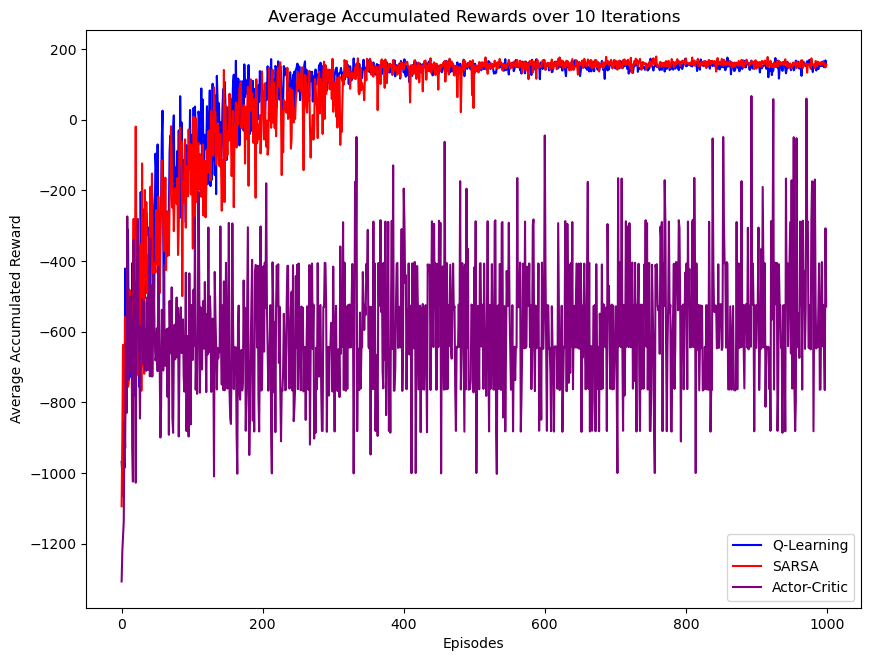

In [46]:
# Plot the average accumulated rewards for all three algorithms
plt.figure(figsize=(10, 7.5))
plt.title('Average Accumulated Rewards over 10 Iterations')
plt.xlabel('Episodes')
plt.ylabel('Average Accumulated Reward')
plt.plot(average_accumulated_rewards_q, label='Q-Learning', color='blue')
plt.plot(average_accumulated_rewards_sarsa, label='SARSA', color='red')
plt.plot(average_accumulated_rewards_ac, label='Actor-Critic', color='purple')
plt.legend()

## Part 2: MDM2-p53 Pathways

In [47]:
def sarsa_lambda(State_Matrix, goal_state, episodes, alpha, gamma, epsilon, lambda_, max_steps, actions): # lambda is a keyword in Python so I used lambda_
    Q = np.random.rand(*State_Matrix.shape, 4)  # Initialize Q-values
    E = np.zeros_like(Q)  # Eligibility traces
    policy = np.zeros(State_Matrix.shape, dtype=int)
    accumulated_rewards = np.zeros(episodes)
    goal_state_reached_counter = 0

    for episode in range(episodes):
        # Reset eligibility traces
        E.fill(0)
        # Initialize state randomly
        state = (np.random.choice(np.where(~np.isnan(State_Matrix))[0]), 
                 np.random.choice(np.where(~np.isnan(State_Matrix))[1]))
        total_reward = 0
        steps = 0
        
        # Initial action selection using epsilon-greedy policy
        if np.random.rand() < epsilon:
            action = np.random.choice(4)  # Explore: random action
        else:
            action = np.argmax(Q[state])  # Exploit: select the best action based on current Q-values
            # Add stochasticity
            if np.random.rand() < p:
                action = np.random.choice(4)
            else:
                action = np.argmax(Q[state])

        while not np.array_equal(state, goal_state) and steps < max_steps:
            # Calculate next state based on current action
            next_i, next_j = state[0] + actions[action][0], state[1] + actions[action][1]

            # Check if next state is valid
            if 0 <= next_i < State_Matrix.shape[0] and 0 <= next_j < State_Matrix.shape[1] and not np.isnan(State_Matrix[next_i, next_j]):
                next_state = (next_i, next_j)
            else:
                next_state = state  # Stay in current state if move is invalid

            # Reward function assumed to be defined elsewhere
            r = reward(next_state)
            total_reward += r

            # Select next action from next state using epsilon-greedy policy
            if np.random.rand() < epsilon:
                next_action = np.random.choice(4)
            else:
                next_action = np.argmax(Q[next_state])

            # Update eligibility trace
            E[state][action] += 1

            # Calculate TD error
            td_error = r + gamma * Q[next_state][next_action] - Q[state][action]

            # Update all Q-values and eligibility traces
            for i in range(Q.shape[0]):
                for j in range(Q.shape[1]):
                    for a in range(Q.shape[2]):
                        Q[i, j, a] += alpha * td_error * E[i, j, a]
                        E[i, j, a] *= gamma * lambda_  # Decay eligibility trace

            # Update state and action
            state, action = next_state, next_action
            # Increment step count
            steps += 1

            # Increment counter if goal state reached
            if np.array_equal(state, goal_state):
                goal_state_reached_counter += 1

        # Store total reward for this episode
        accumulated_rewards[episode] = total_reward

    # Derive final policy from Q-values
    for i in range(State_Matrix.shape[0]):
        for j in range(State_Matrix.shape[1]):
            if not np.isnan(State_Matrix[i, j]):
                policy[i, j] = np.argmax(Q[i, j])

    return policy, accumulated_rewards, goal_state_reached_counter


In [48]:
# S_k = [Connectivity Matrix]*s_k-1 xor a_k-1 xor n_k
# Connectivity Matrix
Connectivity_Matrix = np.array([
    [0, 0, -1, 0],
    [1, 0, -1, -1],
    [0, 1, 0, 0],
    [-1, 1, 1, 0]
])

# Action Space
a0 = np.array([
    [0],
    [0],
    [0],
    [0]
])
a1 = np.array([
    [0],
    [1],
    [0],
    [0]
])
a2 = np.array([
    [0],
    [0],
    [1],
    [0]
])
a3 = np.array([
    [0],
    [0],
    [0],
    [1]
])
actions = [a0, a1, a2, a3]

# The state matrix consists of 16 states: s0, s1, s2, s3, s4, s5, s6, s7, s8, s9, s10, s11, s12, s13, s14, s15 corresponding to 0 or 1 in 4 positions and the goal is when all values are 0 (s0).
# Ideally, we want to stay away from s0, as it terminates the episode. 
s0 = np.array([
    [0],
    [0],
    [0],
    [0]
])

In [49]:
# Define the shape as a 4x1 column vector
shape = (4, 1)

# Generate n_k as a Bernoulli noise with parameter p (for each element)
def generate_n_k(p, shape):
    n_k = np.random.binomial(n=1, p=p, size=shape)
    return n_k

In [50]:
# Cost Function
def cost_function(action):
    if action in [1,2]:
        return -1
    else:
        return 0

# Reward Function
def reward_function(current_state, action, next_state):
    s1_prime, s2_prime, s3_prime, s4_prime = next_state
    reward = 5 * s1_prime + 5 * s2_prime + 5 * s3_prime + 5 * s4_prime - cost_function(action)
    return reward

def next_state_function(current_state, action, p):
    # Generate noise vector n_k
    n_k = generate_n_k(p, shape)
    
    # Calculate the next state
    state_transition = np.dot(Connectivity_Matrix, current_state)
    state_transition = np.where(state_transition > 0, 1, 0)
    intermediate_state = np.bitwise_xor(state_transition, action)
    next_state = np.bitwise_xor(intermediate_state, n_k)
    
    return next_state

def get_state_index(state_vector):
    return int(''.join(str(int(bit)) for bit in state_vector), 2)

In [51]:
p = 0.05
gamma = 0.95
alpha = 0.2
epsilon = 0.1
beta = 0.05
lambda_ = 0.95
episodes = 500
max_steps = 500

### 2.1: Q-Learning

In [52]:
def q_learning(episodes, alpha, gamma, epsilon, max_steps, actions):
    Q = np.random.rand(16, 4)  # Initialize Q-values for 16 states and 4 actions
    accumulated_rewards = np.zeros(episodes)
    policy = np.zeros(16, dtype=int)

    for episode in range(episodes):
        state_index = np.random.choice(16)
        current_state = np.array(list(format(state_index, '04b')), dtype=int).reshape(shape)
        total_reward = 0
        steps = 0

        while state_index != 0 and steps < max_steps:
            if np.random.rand() < epsilon:
                action_index = np.random.choice(4)
            else:
                action_index = np.argmax(Q[state_index])

            next_s = next_state_function(current_state, actions[action_index], p)
            next_state_index = get_state_index(next_s)

            r = reward_function(current_state, action_index, next_s)
            # Q-Learning update: max_a' Q(next_state, a')
            best_next_action_index = np.argmax(Q[next_state_index])
            td_error = r + gamma * Q[next_state_index][best_next_action_index] - Q[state_index][action_index]

            Q[state_index][action_index] += alpha * td_error

            state_index = next_state_index
            current_state = next_s
            total_reward += r
            steps += 1

        accumulated_rewards[episode] = total_reward
        policy[state_index] = np.argmax(Q[state_index])

    return policy, accumulated_rewards

[1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1]
[3 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1]
[2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1]
[2 2 1 1 1 2 2 2 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[4 1 2 1 1 1 1 2 1 3 1 1 1 1 1 2]
[4 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1]
[1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1]


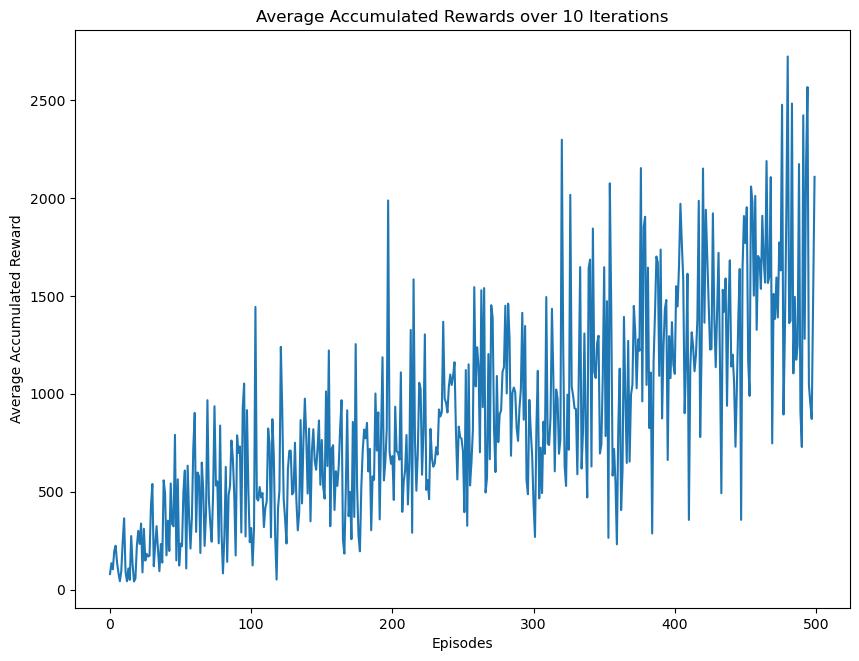

In [53]:
# Run 10 iterations of the Q-Learning Algorithm

average_accumulated_rewards_q = np.zeros(episodes)
goal_state_reached_counter = np.zeros(10)

for iteration in range(10):
    policy, accumulated_rewards = q_learning(episodes, alpha, gamma, epsilon, 500, actions)
    average_accumulated_rewards_q += accumulated_rewards / 10
    print(policy+1) # Policy + 1 is because the states are 1-indexed in the problem but 0-indexed in the code

# Plot the average accumulated reward over the episodes
plt.figure(figsize=(10, 7.5))
plt.title('Average Accumulated Rewards over 10 Iterations')
plt.xlabel('Episodes')
plt.ylabel('Average Accumulated Reward')
plt.plot(average_accumulated_rewards_q)

### 2.2: SARSA

In [54]:
def sarsa(episodes, alpha, gamma, epsilon, max_steps, actions):
    Q = np.random.rand(16, 4)  # Initialize Q-values for 16 states and 4 actions
    accumulated_rewards = np.zeros(episodes)
    policy = np.zeros(16, dtype=int)

    for episode in range(episodes):
        state_index = np.random.choice(16)
        current_state = np.array(list(format(state_index, '04b')), dtype=int).reshape(shape)
        total_reward = 0
        steps = 0
        
        if np.random.rand() < epsilon:
            action_index = np.random.choice(4)
        else:
            action_index = np.argmax(Q[state_index])

        while state_index != 0 and steps < max_steps:
            next_s = next_state_function(current_state, actions[action_index], p)
            next_state_index = get_state_index(next_s)

            if np.random.rand() < epsilon:
                next_action_index = np.random.choice(4)
            else:
                next_action_index = np.argmax(Q[next_state_index])

            r = reward_function(current_state, action_index, next_s)
            td_error = r + gamma * Q[next_state_index][next_action_index] - Q[state_index][action_index]

            Q[state_index][action_index] += alpha * td_error

            state_index = next_state_index
            current_state = next_s
            action_index = next_action_index
            total_reward += r
            steps += 1

        accumulated_rewards[episode] = total_reward
        policy[state_index] = np.argmax(Q[state_index])

    return policy, accumulated_rewards


[1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1]
[3 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1]
[2 1 1 2 1 1 2 2 1 1 1 1 1 1 1 1]
[4 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1]
[4 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1]
[1 1 1 1 2 2 1 2 1 1 1 1 1 1 1 1]
[4 1 1 2 1 2 1 2 1 1 1 1 1 1 1 1]
[2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1]
[3 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1]
[1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1]


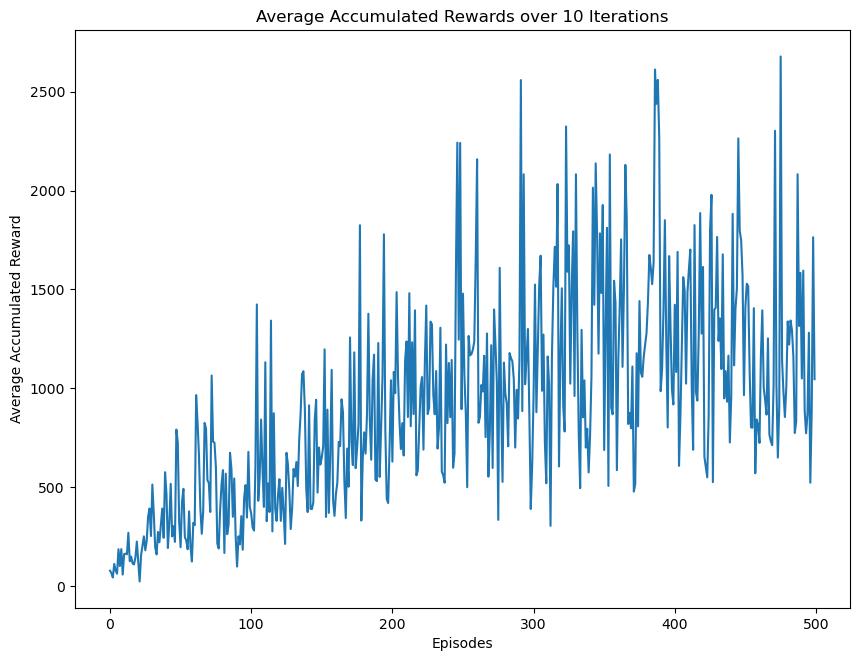

In [55]:
# Run 10 iterations of the SARSA Algorithm

average_accumulated_rewards_sarsa = np.zeros(episodes)
goal_state_reached_counter = np.zeros(10)

for iteration in range(10):
    policy, accumulated_rewards = sarsa(episodes, alpha, gamma, epsilon, 500, actions)
    average_accumulated_rewards_sarsa += accumulated_rewards / 10
    print(policy+1) # Policy + 1 is because the states are 1-indexed in the problem but 0-indexed in the code

# Plot the average accumulated reward over the episodes
plt.figure(figsize=(10, 7.5))
plt.title('Average Accumulated Rewards over 10 Iterations')
plt.xlabel('Episodes')
plt.ylabel('Average Accumulated Reward')
plt.plot(average_accumulated_rewards_sarsa)

### 2.3: SARSA-$\lambda$

In [56]:
def sarsa_lambda(episodes, alpha, gamma, epsilon, lambda_, max_steps, actions):
    Q = np.random.rand(16, 4)  # Initialize Q-values for 16 states and 4 actions
    E = np.zeros_like(Q)       # Eligibility traces
    accumulated_rewards = np.zeros(episodes)
    policy = np.zeros(16, dtype=int)

    for episode in range(episodes):
        E.fill(0)
        state_index = np.random.choice(16)
        current_state = np.array(list(format(state_index, '04b')), dtype=int).reshape(shape)
        total_reward = 0
        steps = 0
        if np.random.rand() < epsilon:
            action_index = np.random.choice(4)
        else:
            action_index = np.argmax(Q[state_index])

        while state_index != 0 and steps < max_steps:
            next_s = next_state_function(current_state, actions[action_index], p)
            next_state_index = get_state_index(next_s)

            if np.random.rand() < epsilon:
                next_action_index = np.random.choice(4)
            else:
                next_action_index = np.argmax(Q[next_state_index])

            r = reward_function(current_state, action_index, next_s)

            td_error = r + gamma * Q[next_state_index][next_action_index] - Q[state_index][action_index]
            E[state_index][action_index] += 1

            Q += alpha * td_error * E
            E *= gamma * lambda_

            state_index = next_state_index
            current_state = next_s
            action_index = next_action_index
            total_reward += r
            steps += 1

        accumulated_rewards[episode] = total_reward
        policy[state_index] = np.argmax(Q[state_index])

        # Convert policy to an array of size [number of states]
        # policy = np.array([policy[i] for i in range(16)])

    return policy, accumulated_rewards

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


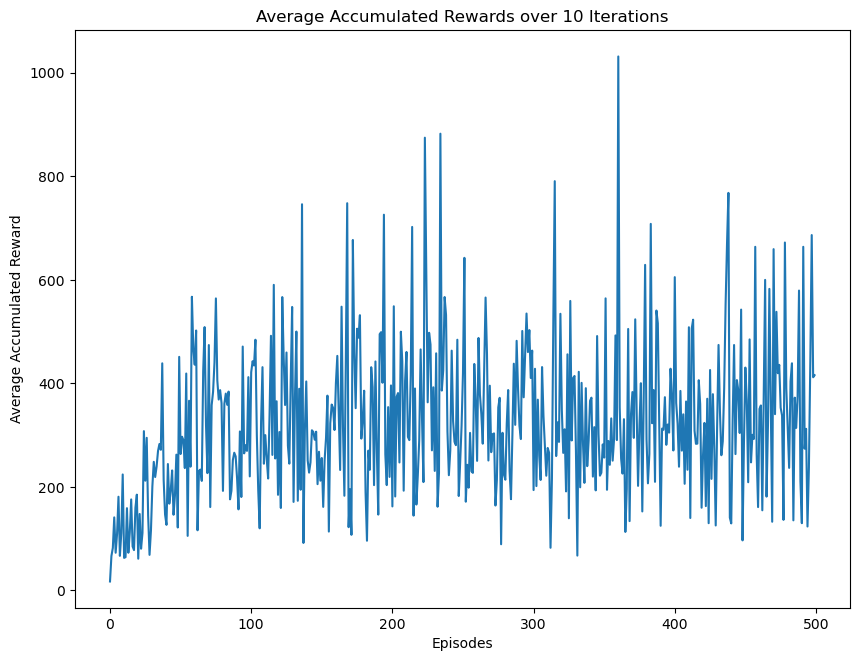

In [57]:
# Run 10 iterations of the SARSA-lambda Algorithm

average_accumulated_rewards_sarsalam = np.zeros(episodes)
goal_state_reached_counter = np.zeros(10)

for iteration in range(10):
    policy, accumulated_rewards = sarsa_lambda(episodes, alpha, gamma, epsilon, lambda_, 500, actions)
    average_accumulated_rewards_sarsalam += accumulated_rewards / 10
    print(policy+1) # Policy + 1 is because the states are 1-indexed in the problem but 0-indexed in the code

# Plot the average accumulated reward over the episodes
plt.figure(figsize=(10, 7.5))
plt.title('Average Accumulated Rewards over 10 Iterations')
plt.xlabel('Episodes')
plt.ylabel('Average Accumulated Reward')
plt.plot(average_accumulated_rewards_sarsalam)


### 2.4: Actor-Critic

In [58]:
def actor_critic(episodes, alpha, beta, gamma, max_steps, actions, p):
    V = np.zeros(16)  # State value function
    H = np.zeros((16, 4))  # Policy parameters (H)
    accumulated_rewards = np.zeros(episodes)
    goal_state_reached_counter = 0

    for episode in range(episodes):
        state_index = np.random.choice(16)
        current_state = np.array(list(format(state_index, '04b')), dtype=int).reshape(shape)
        total_reward = 0
        steps = 0

        while state_index != 0 and steps < max_steps:
            action_probs = np.exp(H[state_index]) / np.sum(np.exp(H[state_index]))
            action_index = np.random.choice(4, p=action_probs)

            next_s = next_state_function(current_state, actions[action_index], p)
            next_state_index = get_state_index(next_s)

            r = reward_function(current_state, action_index, next_s)
            td_error = r + gamma * V[next_state_index] - V[state_index]

            V[state_index] += alpha * td_error
            H[state_index][action_index] += beta * td_error * (1 - action_probs[action_index])

            state_index = next_state_index
            current_state = next_s
            total_reward += r
            steps += 1

        accumulated_rewards[episode] = total_reward

    # Update the greedy policy for each state
    policy = np.argmax(H, axis=1)

    return policy, accumulated_rewards

[1 3 2 3 1 2 2 2 4 3 3 3 1 2 2 2]
[1 2 3 2 2 2 2 2 4 2 2 3 4 2 1 2]
[1 3 2 2 2 2 2 2 4 3 2 3 2 4 2 2]
[1 2 2 2 2 2 2 2 4 3 2 3 3 2 4 2]
[1 2 2 2 2 2 2 2 1 2 3 3 1 2 2 2]
[1 2 2 2 2 2 2 2 1 2 3 2 2 2 2 2]
[1 3 2 2 2 2 1 2 4 3 3 3 3 1 1 2]
[1 2 3 2 2 2 1 2 4 3 3 2 2 4 2 4]
[1 3 3 2 1 2 1 1 1 3 2 3 4 4 2 2]
[1 3 2 3 1 1 1 2 4 3 3 3 3 2 4 2]


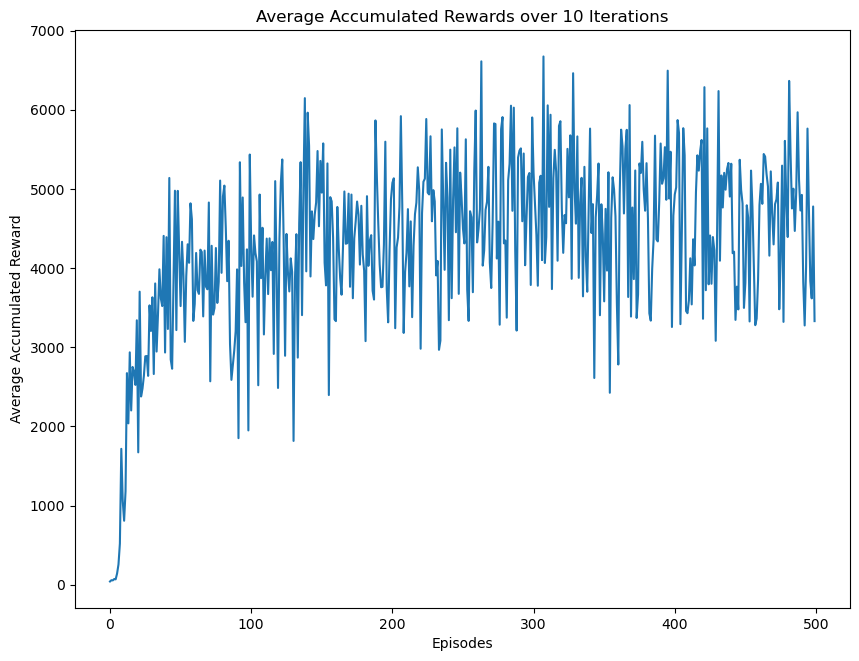

In [59]:
# Run 10 iterations of the Actor-Critic Algorithm
average_accumulated_rewards_ac = np.zeros(episodes)

for iteration in range(10):
    policy, accumulated_rewards = actor_critic(episodes, alpha, beta, gamma, 500, actions, p)
    average_accumulated_rewards_ac += accumulated_rewards / 10
    print(policy+1) # Policy + 1 is because the states are 1-indexed in the problem but 0-indexed in the code
    
# Plot the average accumulated reward over the episodes
plt.figure(figsize=(10, 7.5))
plt.title('Average Accumulated Rewards over 10 Iterations')
plt.xlabel('Episodes')
plt.ylabel('Average Accumulated Reward')
plt.plot(average_accumulated_rewards_ac)

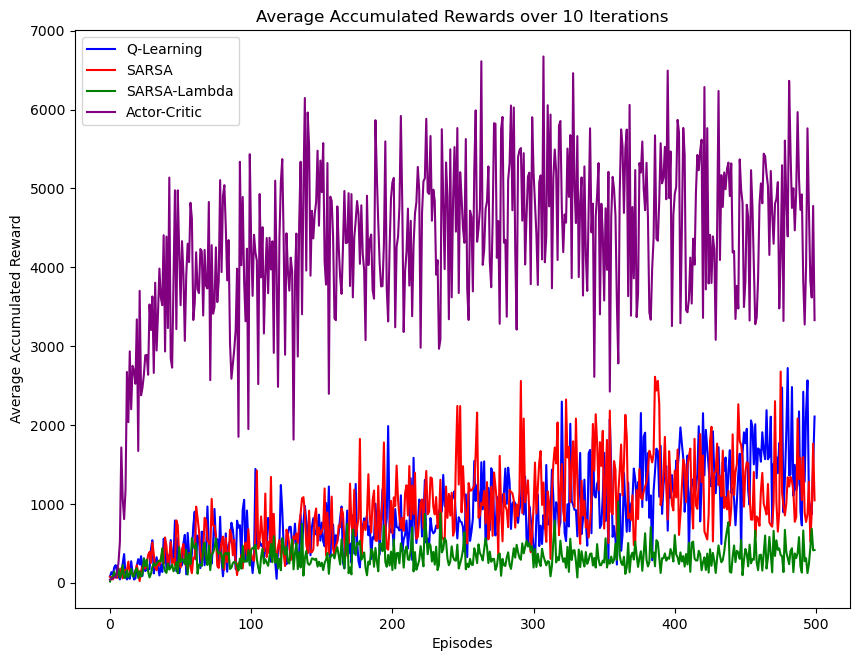

In [60]:
# Plot the average accumulated reward over the episodes for all algorithms
# Q-Learning - Blue, SARSA - Red, SARSA-Lambda - Green, Actor-Critic - Purple
plt.figure(figsize=(10, 7.5))
plt.title('Average Accumulated Rewards over 10 Iterations')
plt.xlabel('Episodes')
plt.ylabel('Average Accumulated Reward')
plt.plot(average_accumulated_rewards_q, label='Q-Learning', color='blue')
plt.plot(average_accumulated_rewards_sarsa, label='SARSA', color='red')
plt.plot(average_accumulated_rewards_sarsalam, label='SARSA-Lambda', color='green')
plt.plot(average_accumulated_rewards_ac, label='Actor-Critic', color='purple')
plt.legend()

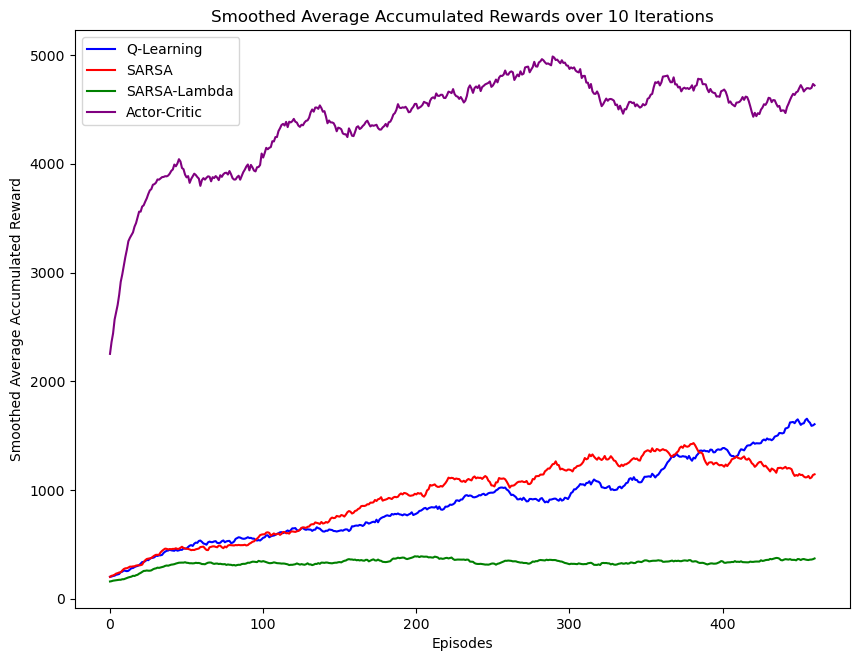

In [61]:
# Smooth by binning averages over every n episodes
def smooth(data, window_size):
    smoothed_data = np.zeros(len(data) - window_size + 1)
    for i in range(len(smoothed_data)):
        smoothed_data[i] = np.mean(data[i:i+window_size])
    return smoothed_data

# Plot the smoothed average accumulated reward over the episodes for all algorithms
# Q-Learning - Blue, SARSA - Red, SARSA-Lambda - Green, Actor-Critic - Purple
window_size = 40
plt.figure(figsize=(10, 7.5))
plt.title('Smoothed Average Accumulated Rewards over 10 Iterations')
plt.xlabel('Episodes')
plt.ylabel('Smoothed Average Accumulated Reward')
plt.plot(smooth(average_accumulated_rewards_q, window_size), label='Q-Learning', color='blue')
plt.plot(smooth(average_accumulated_rewards_sarsa, window_size), label='SARSA', color='red')
plt.plot(smooth(average_accumulated_rewards_sarsalam, window_size), label='SARSA-Lambda', color='green')
plt.plot(smooth(average_accumulated_rewards_ac, window_size), label='Actor-Critic', color='purple')
plt.legend()